In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import musicbrainzngs as mb
import src/client_secret as creds

# set seaborn appearance (darkgrid is default)
# sns.set(style="darkgrid")


SyntaxError: invalid syntax (<ipython-input-13-9d69fd57df4f>, line 8)

# Spotify Data

In [5]:
df = pd.read_csv('data/SpotifyFeatures.csv')

## Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

## Head

In [7]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


## Tail

In [8]:
df.tail(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.23100,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.10400,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.56600,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


 ## Checking distributions of parameters

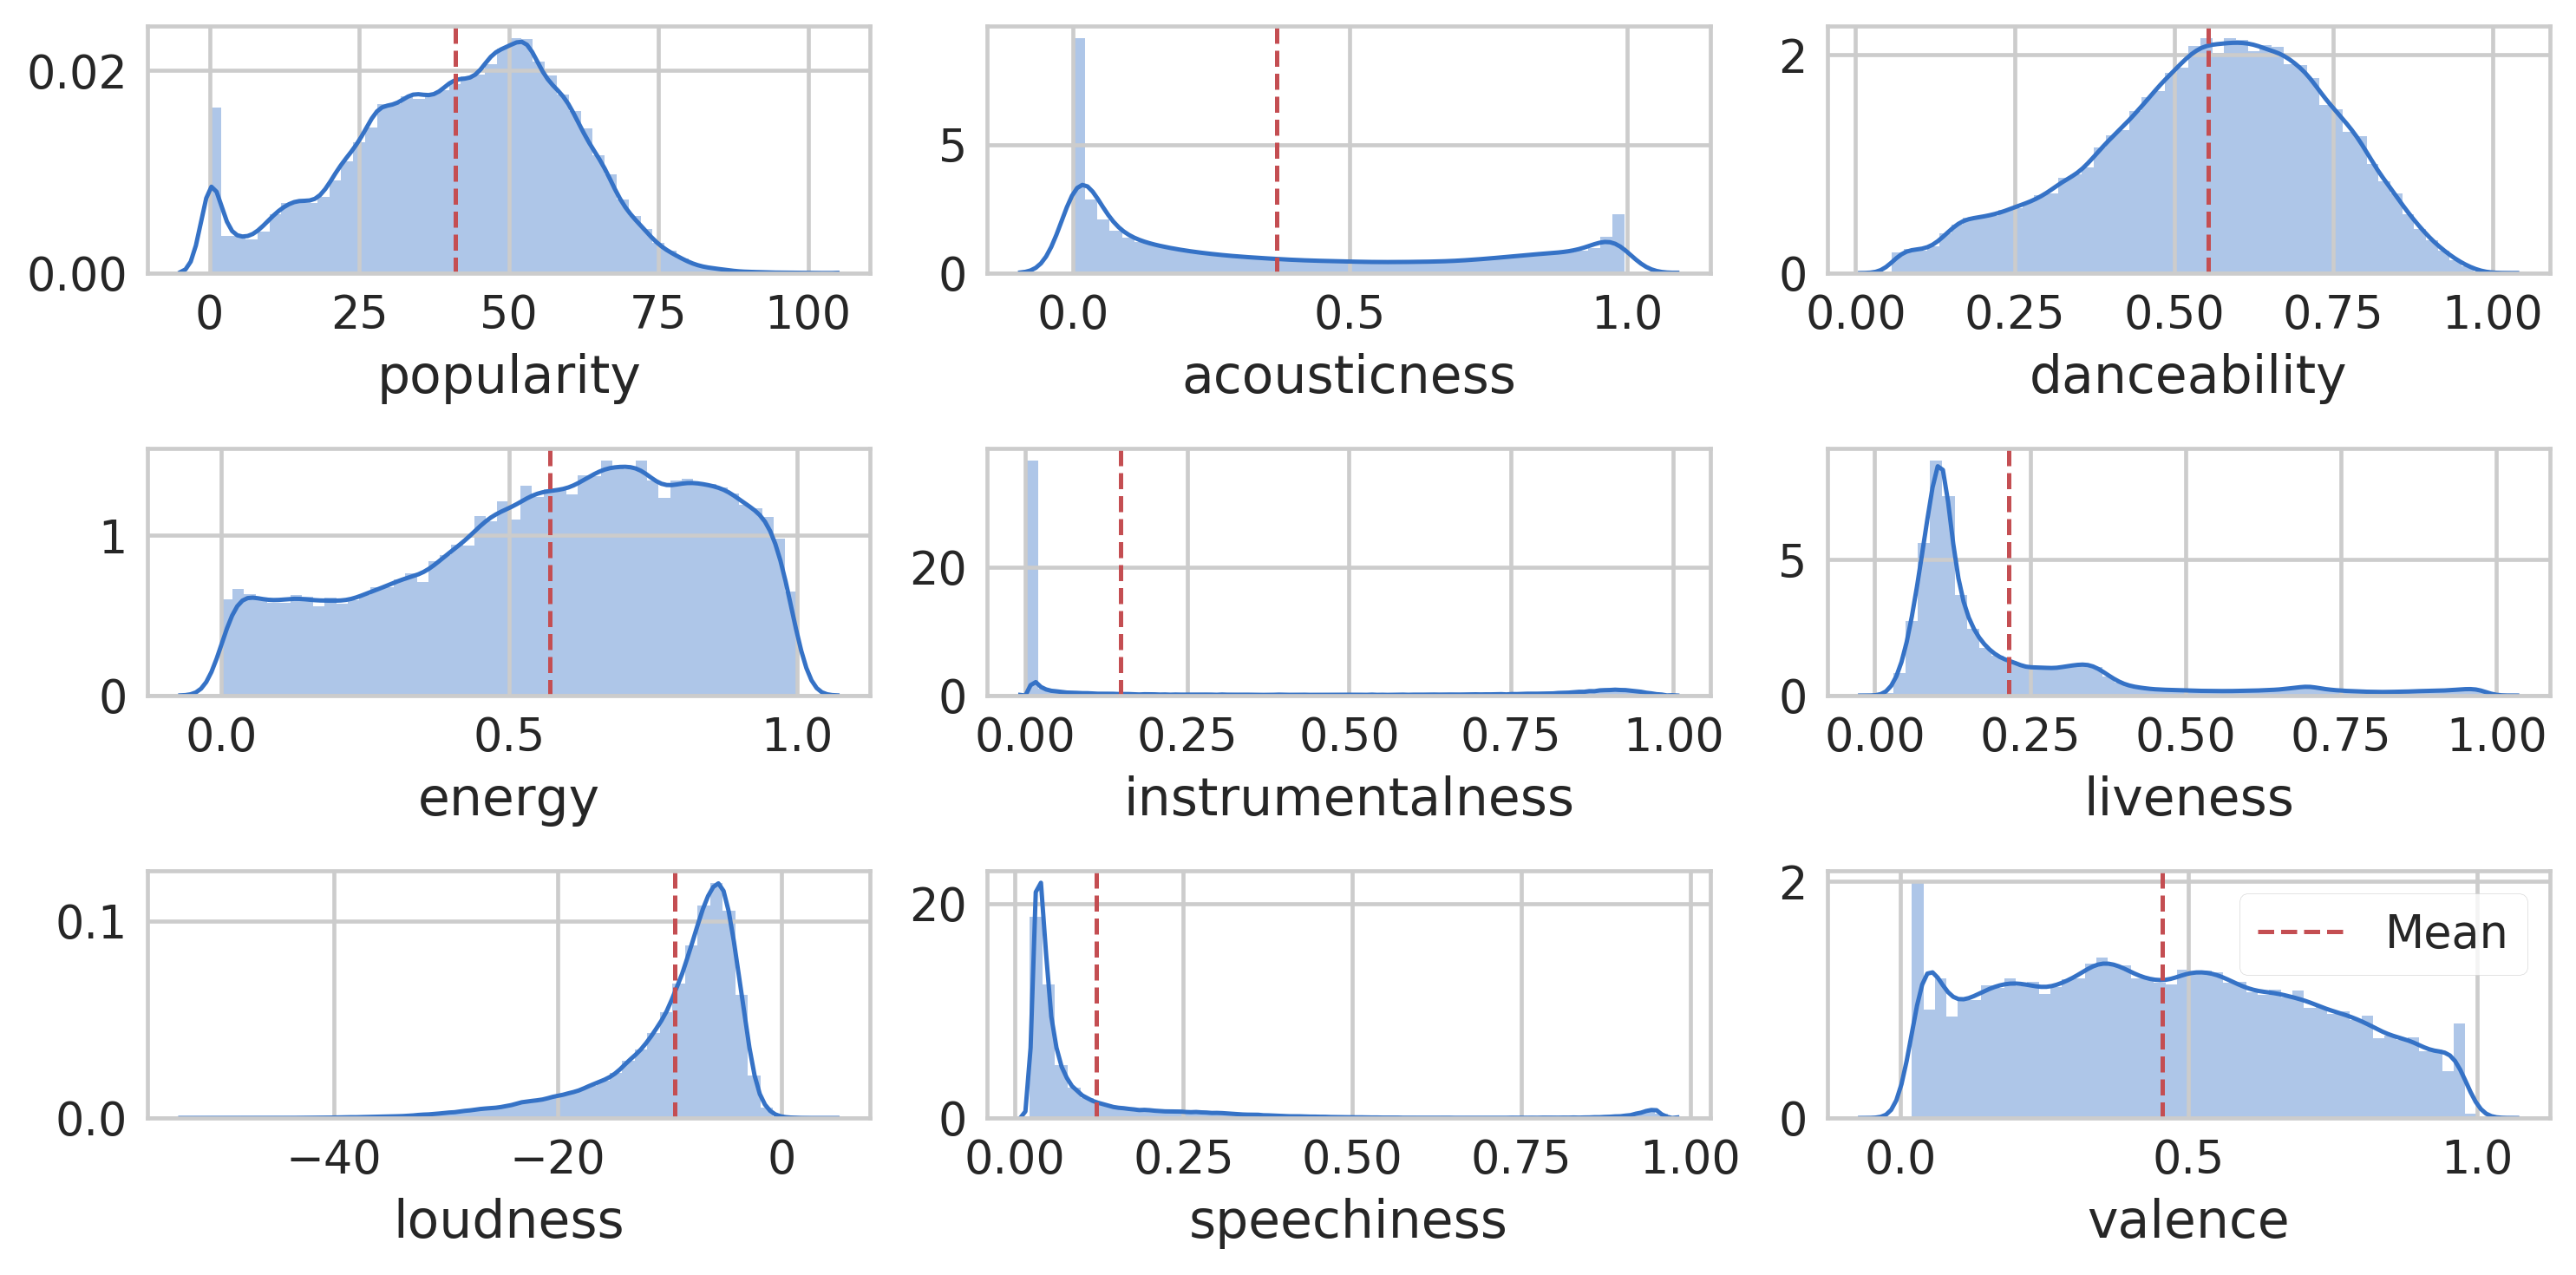

In [9]:
numeric_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = [10,5], dpi=300)

for i, column in enumerate(numeric_columns):
    
    sns.distplot(df[column].dropna(), ax=axes[i//3, i%3])
    
    mean = df[column].mean()
    axes[i//3, i%3].axvline(mean, color='r', linestyle='--')
    
    
plt.legend({'Mean':mean})
fig.tight_layout()

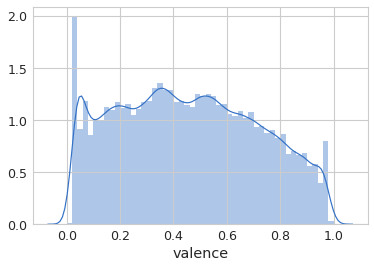

In [10]:
sns.distplot(df['valence'])

Popularity, valence, acousticness appear to have more 0 values than would be intuitive - could be some thresholds involved.

# Artist origin data

In [11]:
# np array of artist names
artists_array = df['artist_name'].unique()
print(str(len(artists_array)) + ' unique artists in dataset.')

14564 unique artists in dataset.


In [1]:
# set up musicbrainz connection
mb.auth()